<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JavierP-rez/blob/main/Semana6_19to25Oct/ActividadSemanal5_RepasoTransformaci%C3%B3nYReducci%C3%B3nDeDimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones 



* Nombre:
  * Javier Pérez Sanagustín

* Matrícula:
  * A01794233

Materia: Ciencia y analítica de datos (Gpo 10)

Profesor titular: María de la Paz Rico Fernández

Profesor tutor: Bernardo Charles Canales

Fecha: 21 de octubre del 2022


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)

## Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, 
#Es importante comentar que la matriz da lo mismo que A.
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
r1 = np.matmul(W,D)
B = np.matmul(r1,Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
#Matriz 1
###-----------------EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# Se define la matriz A
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# Se calcula la eigendescomposición
values, vectors = eig(A)
print("D: ")
print(values) #D
print("W: ")
print(vectors) #W
#Reconstrucción
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Reconstruccion de B=W*D*Winv
# Matrix multiplication is associative, i.e. (AB)C=A(BC) for every three matrices where multiplication makes sense (i.e. the sizes are right).
# That means that the matrices (AB)C and A(BC) have all their components pairwise equal, thus (AB)C=A(BC).
#Es importante comentar que la matriz no da lo mismo que A.
r1 = np.matmul(W,D)
B = np.matmul(r1,Winv)
print("B: ")
print(B)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
D: 
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
W: 
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
B: 
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]


In [ ]:
#Matriz 2
###-----------------EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# Se define la matriz A
A = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# Se calcula la eigendescomposición
values, vectors = eig(A)
print("D: ")
print(values) #D
print("W: ")
print(vectors) #W
#Reconstrucción
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Reconstruccion de B=W*D*Winv
# Matrix multiplication is associative, i.e. (AB)C=A(BC) for every three matrices where multiplication makes sense (i.e. the sizes are right).
# That means that the matrices (AB)C and A(BC) have all their components pairwise equal, thus (AB)C=A(BC).
#Es importante comentar que la matriz no da lo mismo que A.
r1 = np.matmul(W,D)
B = np.matmul(r1,Winv)
print("B: ")
print(B)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
D: 
[ 3. -2.  1.]
W: 
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
B: 
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [ ]:
#Matriz 3
###-----------------EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# Se define la matriz A
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# Se calcula la eigendescomposición
values, vectors = eig(A)
print("D: ")
print(values) #D
print("W: ")
print(vectors) #W
#Reconstrucción
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Reconstruccion de B=W*D*Winv
# Matrix multiplication is associative, i.e. (AB)C=A(BC) for every three matrices where multiplication makes sense (i.e. the sizes are right).
# That means that the matrices (AB)C and A(BC) have all their components pairwise equal, thus (AB)C=A(BC).
#Es importante comentar que la matriz no da lo mismo que A.
r1 = np.matmul(W,D)
B = np.matmul(r1,Winv)
print("B: ")
print(B)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
D: 
[ 6.89167094 -0.214175   -0.67749594]
W: 
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
B: 
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


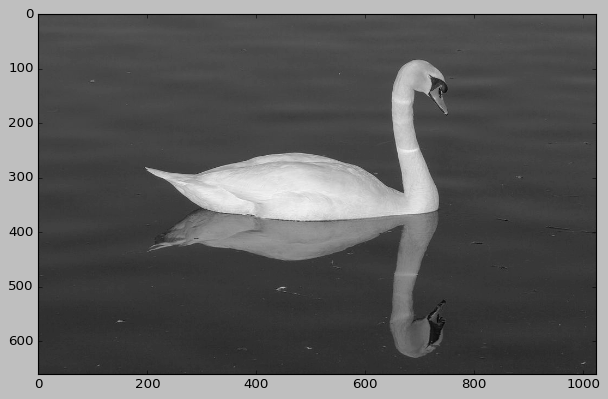

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FC447FA47D0>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

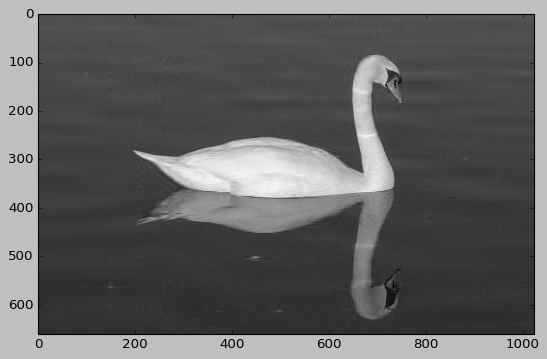

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[189. 189. 189. ...  58.  59.  60.]


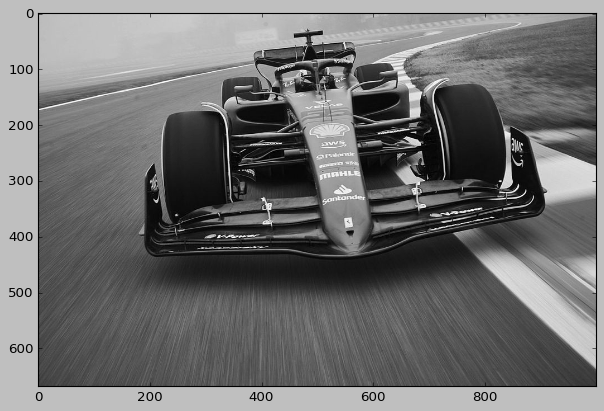

<PIL.Image.Image image mode=LA size=1000x667 at 0x7FC445A87890>


In [ ]:
#imagen 1
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://cdn-1.motorsport.com/images/amp/0oOjXd70/s1000/carlos-sainz-jr-ferrari-f1-75-.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(667, 1000)

In [ ]:
U.shape

(667, 667)

In [ ]:
V.shape

(1000, 1000)

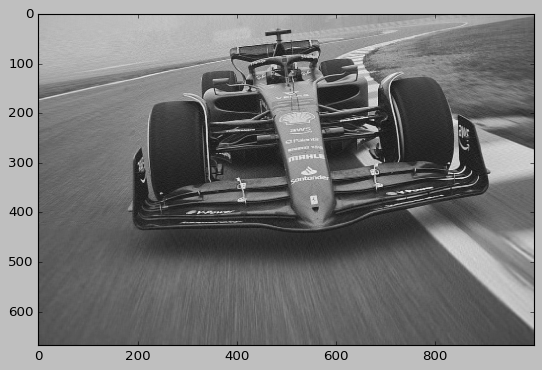

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-667, siendo 667 como normalmente están los datos
#con 150 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 150
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[58. 62. 64. ... 78. 79. 79.]


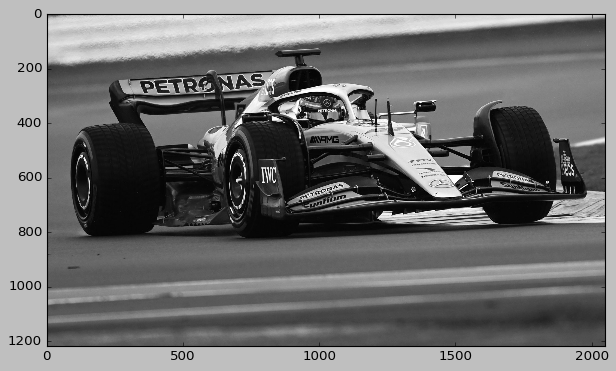

<PIL.Image.Image image mode=LA size=2048x1216 at 0x7FC445B36350>


In [ ]:
#imagen 2

from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://s3-eu-west-1.amazonaws.com/racingnews-v2-prod/2022/Russell/Russell-header.jpg?v=1645192884')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(1216, 2048)

In [ ]:
U.shape

(1216, 1216)

In [ ]:
V.shape

(2048, 2048)

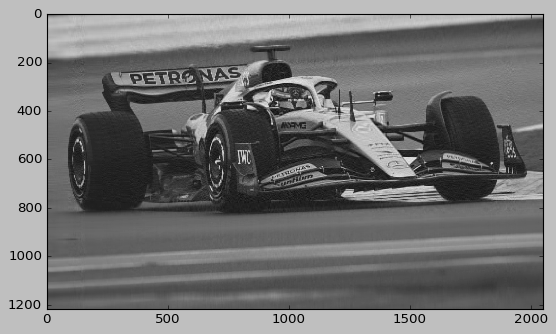

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-1216, siendo 1216 como normalmente están los datos
#con 100 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[0. 0. 0. ... 0. 0. 0.]


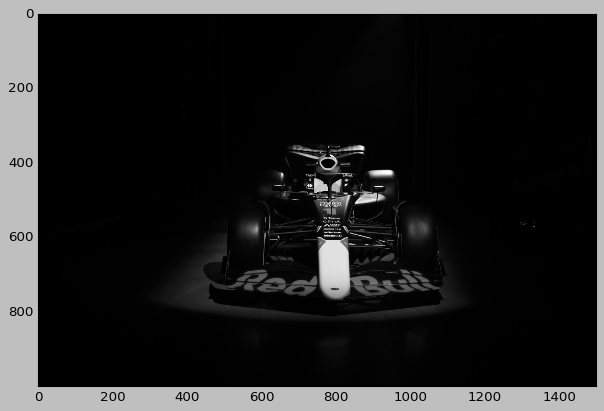

<PIL.Image.Image image mode=LA size=1500x1000 at 0x7FC444C4E290>


In [ ]:
#imagen 3
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://img.redbull.com/images/c_limit,w_1500,h_1000,f_auto,q_auto/redbullcom/2022/7/9/azmgioyzdr7fmcq45v4s/red-bull-racing-rb18')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(1000, 1500)

In [ ]:
U.shape

(1000, 1000)

In [ ]:
V.shape

(1500, 1500)

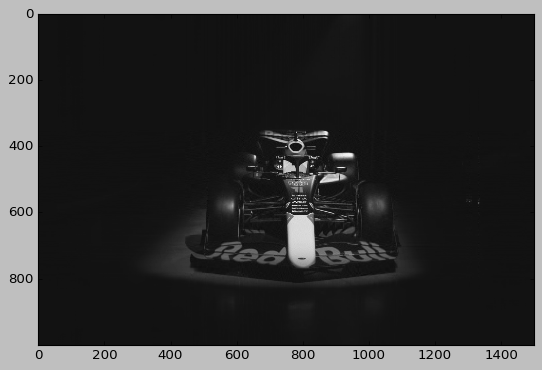

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-1000, siendo 1000 como normalmente están los datos
#con 100 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

### El número máximo de componentes significativos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

#----------Modelo PCA con el dataset de Iris

# Cargar los datos 
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Normalizacion de los datos por Z-score
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

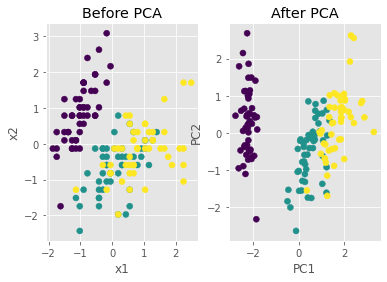

In [ ]:
#Plot de los datos antes y después del PCA
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
#Varianza de PC1 y PC2
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


Se observa que el PC1 explica el 73% de la varianza y PC2 el 22%, juntos explican el 95% de la varianza total.

### Prueba de que los valores propios de la matriz de covarianza original son iguales a las varianzas del espacio reducido

Verificado usando Python

In [ ]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [ ]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

Se observa que los datos de la diagonal de la matriz de covarianza son los mismos que los eigenvalores del modelo de PCA.

### Features Importance

Se procede a obtener los componentes más importantes

In [ ]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Los componentes 1, 3 y 4 son los más importantes para el PC1. De igual manera los componentes 1 y 2 son los más importantes para el PC2.

### The bi-plot

In [ ]:
#Mejorar la visualizacion del PCA
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

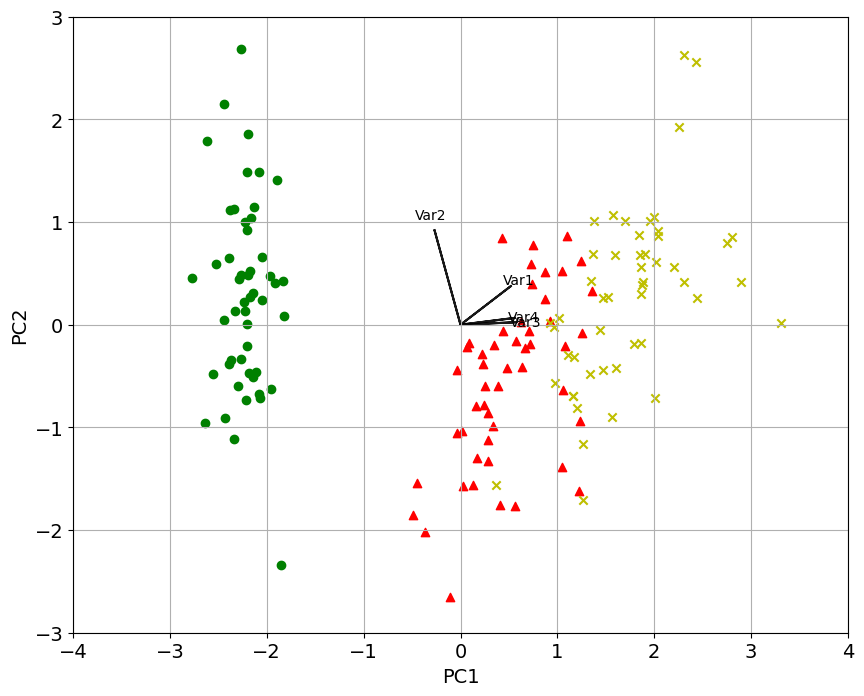

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Los componentes 1, 3 y 4 son los más importantes para el PC1. De igual manera los componentes 1 y 2 son los más importantes para el PC2.

In [ ]:
# Las variables 3 y 4 están positivamente correlacionadas
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [ ]:
# Las variables 2 y 3 están negativamente correlacionadas
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

### Describe lo relevante del ejercicio y que descubriste de las variables análizadas.

El análisis de PCA es una técnica de reducción de dimensiones/complejidad, con éllo poder ver los componentes, variables, correlación, etc. El análisis de PCA consiste en transformar el conjunto de datos, las variables correlacionadas en un número más chico de variables no correlacionadas. Para lograr hacer dicha disminución a variables no correlacionadas se hace una proyección (transformación ortogonal) de los datos originales a un espacio reducido del PCA, usando los eigenvalores de la matriz de correlacción.

Lo que se descubrió de las variables analizadas es que PC1 explica 73% de la varianza y PC2 EL 22%, por lo que explica el 95% de la varianza total. También se descubrió la correlación de las variables. Las variables 3 y 4 tienen una correlación positiva; las variables 2 y 3 tienen una correlación negativa. 

### Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.


    ¿Qué es feature importance y para qué nos sirve?

Feature importance se refiere a técnicas que calculan la puntuación para todas las entradas de un modelo dado. Una puntuación alta significa que la característica específica tendrá un gran efecto en el modelo que es usado para cierta variable. Es útil feature importance debido a los siguientes motivos.

  * Entendimientos de los datos.
  * Mejora del modelo.
  * Interpretabilidad del modelo.

En el ejercicio se pudo observar el espacio vectorial del PCA, dando así los componentes ortogonales, para ir bajando la dimensión de las variables de entrada, simplificando el modelo. Otra utilidad del PCA es con el procesamiento de imágenes, por lo que no es necesario que se ocupe el 100% para poder procesar, liberando espacio en la computadora.

    ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

La visualización del espacio vectorial del PCA, incluyendo los vectores ortogonales, las variables correlacionadas para simplificar las entradas de los modelos. Las variables no correlacionadas para ver la dimensión real de los modelos. De igual manera, la compensación de imágenes, que ayudará a ver los pesos mínimos para su procesamiento, mejorando el desempeño con una menor cantidad de píxeles. Y sobre todo la implementación en Python para sacar dichos componentes, visualizarlos en las gráficas, con ello tener una mejor visión de los atributos.

    ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Para el análisis de datos, el poder reducir de dimensión las entradas de los modelos, resultará efectivo debido a varios motivos. El saber qué variables están correlacionadas, nos ayudará a reducir el tamaño de las entradas, simplificando el modelo y obteniendo los mismos resultados; con ello, se obtendrá una reducción en el procesamiento de la computadora, haciendo el proceso más ligero y, por lo tanto, más rápido. En resumen, ayudar en simplificar el modelo, viendo las variables correlacionales, con ello mejorar el modelo con las variables ortogonales.
